<div style="
  background: linear-gradient(to right, #1e88e5, #90caf9);
  padding: 25px;
  border-radius: 12px;
  color: #ffffff;
  font-size: 24px;
  font-weight: bold;
  text-align: center;
  box-shadow: 0 4px 10px rgba(0,0,0,0.2);
  margin-bottom: 30px;
">
  🎖️ ANSUR II: Military Anthropometric Ethnicity Prediction
</div>

### *Classifying Soldier Race via Body Measurements (XGBoost + SHAP)*

> This notebook explores how physical measurements from the ANSUR II dataset can be used to predict soldier ethnicity using machine learning techniques like XGBoost and SHAP explainability.

## 🧭 Introduction

<!-- Header: Dataset Overview -->
<div style="background: linear-gradient(to right, #0d47a1, #42a5f5); padding: 16px 22px; border-radius: 12px; font-size: 1.6em; font-weight: bold; color: white; box-shadow: 0 4px 10px rgba(0,0,0,0.15); margin-bottom: 18px;">
📦 ANSUR II Dataset Overview
</div>

<p style="line-height: 1.7; font-size: 16px;">
The <strong>ANSUR II</strong> dataset, derived from the 2012 U.S. Army Anthropometric Survey, is the most comprehensive and standardized collection of military body measurements to date. This project explores how anthropometric features can be used to predict a soldier’s <strong>ethnicity</strong> using supervised learning models like <strong>Logistic Regression</strong>, <strong>Random Forest</strong>, and <strong>XGBoost</strong>, enhanced with <strong>SHAP explainability</strong>.
</p>

<!-- Dataset Highlights -->
<div style="background: linear-gradient(to right, #1b5e20, #66bb6a); padding: 12px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: white; margin-top: 30px; margin-bottom: 10px;">
📌 Dataset Highlights
</div>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>📍 <strong>Origin</strong>: U.S. Army Anthropometric Survey (2012)</li>
  <li>👥 <strong>Subjects</strong>: 6,068 military personnel (4,082♂ / 1,986♀)</li>
  <li>📏 <strong>Features</strong>:
    <ul>
      <li>93 direct body measurements (e.g., head, hand, foot, chest)</li>
      <li>15 demographic or administrative variables</li>
      <li>3D full-body scans <strong>(⚠️ Not publicly available)</strong></li>
    </ul>
  </li>
  <li>📊 <strong>Unique Value</strong>: Largest standardized military anthropometric database</li>
</ul>

<!-- Applications -->
<div style="background: linear-gradient(to right, #6a1b9a, #ba68c8); padding: 12px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: white; margin-top: 30px; margin-bottom: 10px;">
🎯 Key Applications
</div>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>🧬 Ethnicity classification models</li>
  <li>🎒 Ergonomic equipment and gear design</li>
  <li>🦾 Biomechanical and human factors research</li>
</ul>

<!-- Data Structure Table -->
<div style="background: linear-gradient(to right, #1565c0, #64b5f6); padding: 12px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: white; margin-top: 30px; margin-bottom: 10px;">
📊 Data Structure
</div>

<table style="width: 100%; border-collapse: collapse; font-size: 15px;">
  <thead style="background-color: #e3f2fd; color: #1565c0;">
    <tr>
      <th style="text-align: left; padding: 10px; border-bottom: 2px solid #bbdefb;">Category</th>
      <th style="text-align: left; padding: 10px; border-bottom: 2px solid #bbdefb;">Examples</th>
    </tr>
  </thead>
  <tbody style="color: #0d47a1;">
    <tr>
      <td style="padding: 10px;">Body Measurements</td>
      <td style="padding: 10px;"><code>stature</code>, <code>handlength</code>, <code>headcircumference</code></td>
    </tr>
    <tr>
      <td style="padding: 10px;">Demographics</td>
      <td style="padding: 10px;"><code>DODRace</code>, <code>Gender</code>, <code>Age</code>, <code>PrimaryMOS</code></td>
    </tr>
    <tr>
      <td style="padding: 10px;">3D Scans</td>
      <td style="padding: 10px;">Body/head/foot contours <i>(restricted access)</i></td>
    </tr>
  </tbody>
</table>

<!-- Importance Section -->
<div style="background: linear-gradient(to right, #ff8f00, #ffe082); padding: 12px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: #3e2723; margin-top: 30px; margin-bottom: 10px;">
🚀 Why This Matters
</div>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>🎖️ <strong>Military</strong>: Optimize uniform and gear sizing across diverse populations</li>
  <li>🧬 <strong>Research</strong>: Understand ethnic variation in human anatomy</li>
  <li>⚖️ <strong>AI Ethics</strong>: Case study for <strong>fairness in biometric modeling</strong></li>
</ul>

<!-- Limitations -->
<div style="background: linear-gradient(to right, #c62828, #ef5350); padding: 12px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: white; margin-top: 30px; margin-bottom: 10px;">
⚠️ Dataset Limitations
</div>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>📌 Military-specific population only (ages 18–65)</li>
  <li>🛑 3D scans not publicly available</li>
  <li>⚖️ Class imbalance:
    <ul>
      <li><strong>White</strong>: 65.7%</li>
      <li><strong>Black</strong>: 22.5%</li>
      <li><strong>Hispanic</strong>: 11.8%</li>
    </ul>
  </li>
</ul>

<!-- Closing Quote -->
<blockquote style="background-color: #fff3e0; color: #e65100; padding: 14px 22px; border-left: 5px solid #ffa726; font-style: italic; font-size: 15px; margin-top: 30px;">
💡 <strong>We aim to classify ethnicity (<code>DODRace</code>) using physical body measurements while ensuring model fairness, avoiding data leakage, and promoting explainability.</strong>
</blockquote>


## 📚 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve, auc
)

import shap

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({
    "figure.figsize": (14, 8),
    "axes.titlesize": 20,
    "axes.titleweight": "bold",
    "axes.titlepad": 20,
    "font.size": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})
sns.set_palette("Set1")

# 📁 Load ANSUR II Dataset (Kaggle paths)

In [2]:
male = pd.read_csv("/kaggle/input/ansur-ii/ANSUR II MALE Public.csv", encoding='latin1')
female = pd.read_csv("/kaggle/input/ansur-ii/ANSUR II FEMALE Public.csv", encoding='latin1')

df_male = male.copy()
df_female = female.copy()

df_male["Gender"] = "Male"
df_female["Gender"] = "Female"

df = pd.concat([df_male, df_female], ignore_index=True)

print(f"Combined dataset shape: {df.shape}")
df.head()

Combined dataset shape: (6068, 109)


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("🔄 Standardized Column Names:")
print(df.columns.tolist())

🔄 Standardized Column Names:
['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircum

## 📂 Dataset & Problem Statement

<!-- Header -->
<div style="background: linear-gradient(to right, #1e88e5, #90caf9); padding: 16px 22px; border-radius: 12px; font-size: 1.5em; font-weight: bold; color: white; box-shadow: 0 3px 10px rgba(0,0,0,0.15); margin-bottom: 18px;">
📦 ANSUR II Dataset Summary
</div>

<p style="line-height: 1.7; font-size: 16px;">
The <strong>ANSUR II (2012)</strong> dataset is a large-scale anthropometric study conducted by the <strong>U.S. Army</strong>, containing detailed body measurements of over <strong>6,000 military personnel</strong> (both male and female). It includes more than <strong>90 physical variables</strong> such as height, hand length, and chest circumference, along with demographic attributes like <code>ethnicity (DODRace)</code>, <code>age</code>, <code>gender</code>, and <code>military role (PrimaryMOS)</code>.
</p>

<p style="line-height: 1.7; font-size: 16px;">
This project investigates whether <strong>body measurements can be used to predict ethnicity</strong>, focusing on the <code>DODRace</code> column, which maps ethnic categories as follows:
</p>

<table style="width: 100%; border-collapse: collapse; font-size: 15px; margin-top: 10px; margin-bottom: 20px;">
  <thead style="background-color: #e3f2fd; color: #1565c0;">
    <tr>
      <th style="text-align:left; padding: 8px; border-bottom: 1px solid #bbdefb;">Code</th>
      <th style="text-align:left; padding: 8px; border-bottom: 1px solid #bbdefb;">Ethnicity</th>
    </tr>
  </thead>
  <tbody style="color: #0d47a1;">
    <tr><td style="padding: 8px;">1</td><td style="padding: 8px;">White</td></tr>
    <tr><td style="padding: 8px;">2</td><td style="padding: 8px;">Black</td></tr>
    <tr><td style="padding: 8px;">3</td><td style="padding: 8px;">Hispanic</td></tr>
    <tr><td style="padding: 8px;">4</td><td style="padding: 8px;">Asian</td></tr>
    <tr><td style="padding: 8px;">5</td><td style="padding: 8px;">Native American</td></tr>
    <tr><td style="padding: 8px;">6</td><td style="padding: 8px;">Pacific Islander</td></tr>
    <tr><td style="padding: 8px;">8</td><td style="padding: 8px;">Other</td></tr>
  </tbody>
</table>

<p style="line-height: 1.6; font-size: 16px;">
🔎 To maintain class stability and focus, we selected only the three dominant groups with enough samples:
</p>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>⚪ <strong>White (1)</strong></li>
  <li>⚫ <strong>Black (2)</strong></li>
  <li>🟤 <strong>Hispanic (3)</strong></li>
</ul>

<p style="font-size: 14px; color: #e53935;"><strong>⚠️ Note:</strong> Classes with fewer than 500 samples were excluded from modeling.</p>

<!-- Objective -->
<div style="background: linear-gradient(to right, #6a1b9a, #ab47bc); padding: 14px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: white; margin-top: 30px;">
🎯 Objective
</div>

<p style="line-height: 1.7; font-size: 16px;">
To build a supervised learning model that predicts the <strong>ethnicity of a soldier</strong> based on anthropometric and demographic data using models like:
</p>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>📈 Logistic Regression</li>
  <li>🔍 Support Vector Machine</li>
  <li>🌳 Random Forest</li>
  <li>⚡ XGBoost</li>
</ul>

<!-- Problem Type -->
<div style="background: linear-gradient(to right, #1565c0, #64b5f6); padding: 14px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: white; margin-top: 30px;">
🔍 Problem Type
</div>

<blockquote style="background-color: #e3f2fd; padding: 12px 20px; border-left: 5px solid #2196f3; font-style: italic; font-size: 15px;">
<strong>Multiclass Classification Problem</strong> <br>
Target: <code>DODRace</code> (encoded categorical variable) <br>
Classes: <code>White</code>, <code>Black</code>, <code>Hispanic</code>
</blockquote>

<!-- Challenges -->
<div style="background: linear-gradient(to right, #ef6c00, #ffb74d); padding: 14px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: #3e2723; margin-top: 30px;">
⚠️ Challenges
</div>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>⚖️ <strong>Class Imbalance</strong></li>
  <li>🧮 <strong>Feature Redundancy & Correlation</strong></li>
  <li>📏 <strong>High-Dimensional Numeric Data</strong></li>
  <li>🧠 <strong>Explainability</strong> (solved using SHAP values)</li>
</ul>

<!-- Key Question -->
<div style="background: linear-gradient(to right, #00897b, #4db6ac); padding: 14px 20px; border-radius: 10px; font-size: 1.4em; font-weight: bold; color: white; margin-top: 30px;">
💡 Key Question
</div>

<blockquote style="background-color: #e0f2f1; padding: 14px 20px; border-left: 5px solid #26a69a; font-style: italic; font-size: 15px;">
Can we predict a soldier’s ethnicity using only their body measurements and demographics?
</blockquote>

In [4]:
race_mapping = {
    1: "White",
    2: "Black", 
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
}


df["dodrace_category"] = df["dodrace"].map(race_mapping)

print("✅ Transformed DODRace categories:")
print(df["dodrace_category"].value_counts(dropna=False))

✅ Transformed DODRace categories:
dodrace_category
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64


# 🔍 Exploratory Data Analysis (EDA)

<!-- Section Header -->
<div style="background: linear-gradient(to right, #3949ab, #90caf9); 
            padding: 16px 22px; 
            border-radius: 12px; 
            font-size: 1.4em; 
            font-weight: bold; 
            color: white; 
            box-shadow: 0 3px 8px rgba(0,0,0,0.1); 
            margin-bottom: 16px;">
🔍 Exploratory Data Analysis (EDA) – What Are We Looking For?
</div>

<p style="line-height: 1.7; font-size: 16px; color: #212121;">
Before modeling, we explore the <strong>ANSUR II</strong> dataset to understand:
</p>

<ul style="line-height: 1.8; font-size: 16px; color: #0d47a1;">
  <li>📊 The distribution of <code>DODRace</code> (ethnicity) and <code>Gender</code></li>
  <li>🧩 The presence of <strong>missing</strong> or <strong>duplicate</strong> values</li>
  <li>📏 <strong>Outliers</strong> in key body measurements (e.g., <code>stature</code>, <code>weightkg</code>)</li>
  <li>🔗 <strong>Correlations</strong> between physical features</li>
  <li>⚖️ <strong>Class balance</strong> across ethnic categories</li>
</ul>

<p style="line-height: 1.7; font-size: 16px; color: #212121; margin-top: 12px;">
✅ These checks will help us <strong>clean the data</strong>, engineer better features, and avoid model bias due to data issues.
</p>

<!-- Subsection Header -->
<div style="background: linear-gradient(to right, #1565c0, #64b5f6); 
            padding: 14px 20px; 
            border-radius: 10px; 
            font-size: 1.2em; 
            font-weight: bold; 
            color: white; 
            margin-top: 28px;">
🧾 First Step: Let’s inspect the dataset structure and check for missing values
</div>

In [5]:
print("🧾 Dataset shape:", df.shape)
print("📄 Column types:\n", df.dtypes.value_counts())

🧾 Dataset shape: (6068, 110)
📄 Column types:
 int64      98
object     10
float64     2
Name: count, dtype: int64


In [6]:
def professional_summary(df):
    """
    Generates a professional EDA summary including:
    - Descriptive statistics
    - Skewness & kurtosis
    - Missing value analysis
    """
    print("📊 Basic Statistics:")
    try:
        summary_df = df.describe().T
        summary_df = summary_df[~summary_df.index.duplicated()]
        display(summary_df.style.format("{:.2f}").background_gradient(cmap='Blues'))
    except Exception as e:
        print(f"❌ Error in describe(): {e}")
        display(df.describe().T)

    skewness = df.select_dtypes(include=np.number).apply(stats.skew)
    kurtosis = df.select_dtypes(include=np.number).apply(stats.kurtosis)

    dist_df = pd.DataFrame({
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })
    dist_df = dist_df[~dist_df.index.duplicated()]  # 🔁 kritik satır
    dist_df = dist_df.sort_values(by='Skewness', key=abs, ascending=False)

    print("\n📈 Distribution Patterns:")
    display(dist_df.head(15).style.format("{:.2f}").background_gradient(cmap='Oranges'))

    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        "Missing Count": missing,
        "Missing %": missing_percent
    }).query("`Missing Count` > 0").sort_values(by="Missing %", ascending=False)

    print("\n⚠️ Missing Value Report:")
    if not missing_df.empty:
        missing_df = missing_df[~missing_df.index.duplicated()]  # ✅ Fix duplicate index
    try:
        display(missing_df.style.format({"Missing %": "{:.2f}%"}).background_gradient(cmap="Reds"))
    except:
        print(missing_df)

professional_summary(df)

📊 Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
subjectid,4082.00,20003.37,6568.44,10027.00,14270.25,17236.50,27315.75,29452.00
abdominalextensiondepthsitting,6068.00,246.47,37.40,155.00,219.00,242.00,271.00,451.00
acromialheight,6068.00,1406.16,79.09,1115.00,1350.00,1410.00,1462.00,1683.00
acromionradialelength,6068.00,327.37,20.72,249.00,313.00,328.00,341.25,393.00
anklecircumference,6068.00,224.89,16.05,156.00,214.00,225.00,235.00,293.00
axillaheight,6068.00,1299.61,72.02,1038.00,1249.00,1302.00,1349.00,1553.00
balloffootcircumference,6068.00,244.19,16.85,186.00,232.00,245.00,256.00,306.00
balloffootlength,6068.00,194.75,13.52,151.00,185.00,195.00,204.00,245.00
biacromialbreadth,6068.00,399.20,30.24,283.00,376.00,404.00,421.00,489.00
bicepscircumferenceflexed,6068.00,340.93,41.52,216.00,311.00,341.00,370.00,490.00



📈 Distribution Patterns:


,Skewness,Kurtosis
subjectnumericrace,74.91,5744.08
dodrace,1.97,4.60
age,0.79,-0.20
waistdepth,0.57,0.26
abdominalextensiondepthsitting,0.54,0.22
weightkg,0.44,0.15
hipbreadthsitting,0.42,0.42
weightlbs,0.39,0.17
hipbreadth,0.38,0.53
waistcircumference,0.35,-0.09



⚠️ Missing Value Report:


,Missing Count,Missing %
ethnicity,4647,76.58%
subjectid,4082,67.27%


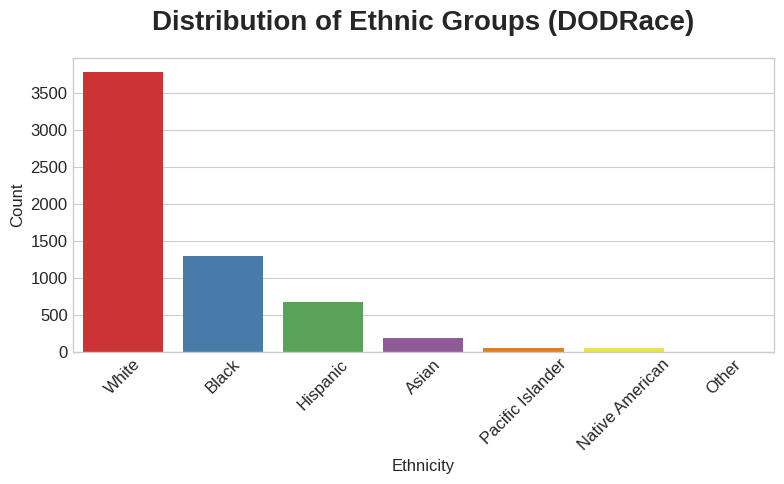

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="dodrace_category", palette="Set1", order=df["dodrace_category"].value_counts().index)
plt.title("Distribution of Ethnic Groups (DODRace)")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

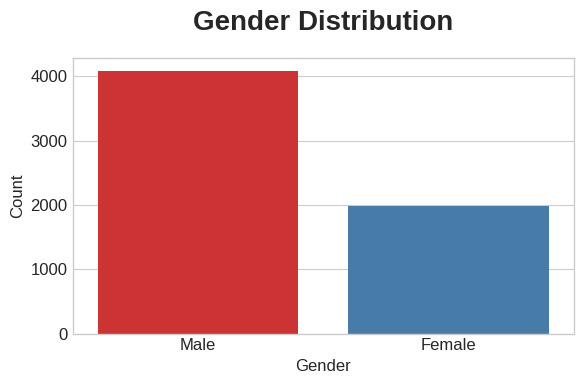

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="gender", palette="Set1")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

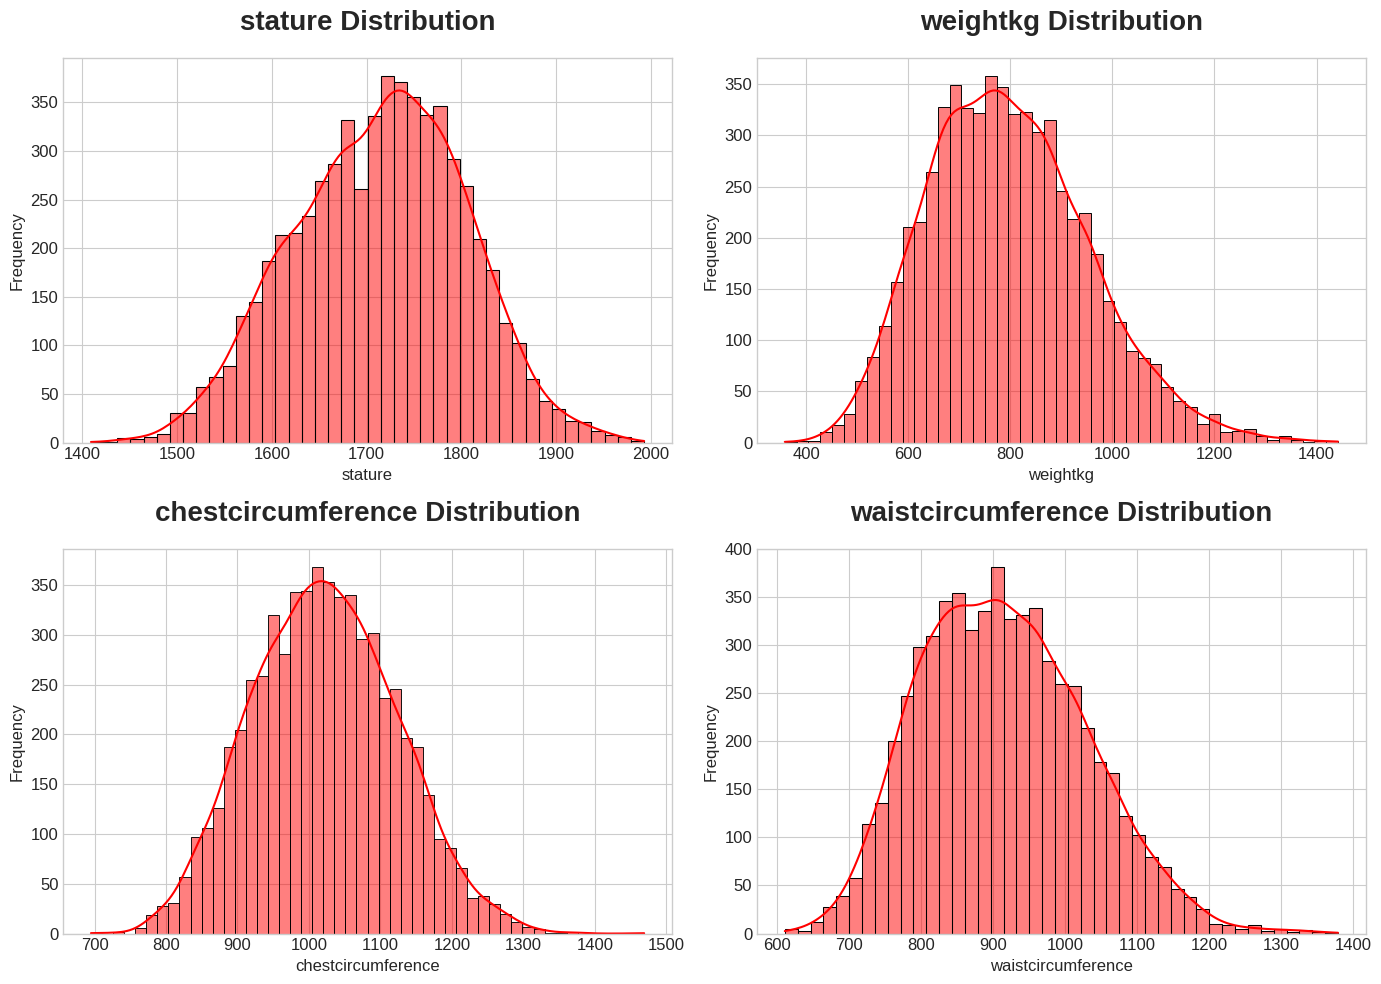

In [9]:
features_to_plot = ['stature', 'weightkg', 'chestcircumference', 'waistcircumference']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color="red")
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## 📏 Missing Values

In [10]:
def handle_missing_values(df, threshold=0.7):
    """
    Handle missing values by:
    - Dropping columns with too many missing values
    - Imputing numerical with median
    - Imputing categorical with mode
    """
    df_clean = df.copy()

    missing = df_clean.isnull().sum()
    missing_pct = missing / len(df_clean)

    high_missing_cols = missing_pct[missing_pct > threshold].index.tolist()
    df_clean.drop(columns=high_missing_cols, inplace=True)

    numeric_cols = df_clean.select_dtypes(include=np.number).columns
    categorical_cols = df_clean.select_dtypes(include='object').columns

    num_imputer = SimpleImputer(strategy='median')
    df_clean[numeric_cols] = num_imputer.fit_transform(df_clean[numeric_cols])


    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_clean[categorical_cols] = cat_imputer.fit_transform(df_clean[categorical_cols])

    print("✅ Missing value handling completed.")
    print(f"Dropped columns: {high_missing_cols if high_missing_cols else 'None'}")
    return df_clean

df_clean = handle_missing_values(df)

✅ Missing value handling completed.
Dropped columns: ['ethnicity']


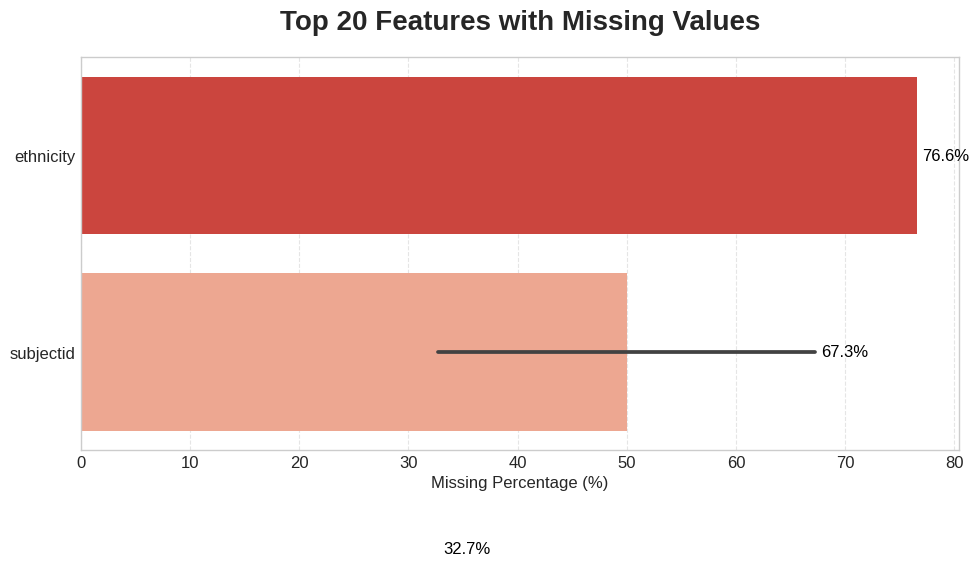

In [11]:
def plot_missing_values(df, top_n=20):
    """
    Visualize top missing value columns as a bar chart.
    """
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = missing_pct[missing_pct > 0].sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.values, y=missing_df.index, palette='Reds_r')
    plt.xlabel("Missing Percentage (%)")
    plt.title(f"Top {top_n} Features with Missing Values")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    for i, v in enumerate(missing_df.values):
        plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
    plt.tight_layout()
    plt.show()

plot_missing_values(df)

In [12]:
def handle_outliers(df, features):
    """
    Caps outliers using the IQR method (1.5 * IQR rule).
    Returns a cleaned DataFrame and a summary report.
    """
    df_out = df.copy()
    report = []

    for col in features:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = ((df_out[col] < lower) | (df_out[col] > upper)).sum()
        report.append({
            'Feature': col,
            'Outliers': outliers,
            'Lower Bound': round(lower, 2),
            'Upper Bound': round(upper, 2)
        })

        df_out[col] = np.where(df_out[col] < lower, lower,
                      np.where(df_out[col] > upper, upper, df_out[col]))

    report_df = pd.DataFrame(report)
    return df_out, report_df

In [13]:
features_to_cap = ['stature', 'weightkg', 'chestcircumference', 'waistcircumference', 'bicepscircumferenceflexed']

df_clean, outlier_report = handle_outliers(df_clean, features_to_cap)

outlier_report.style.format({'Outliers': '{:.0f}'}).background_gradient(cmap='Oranges')

,Feature,Outliers,Lower Bound,Upper Bound
0,stature,14,1460.880000,1969.880000
1,weightkg,56,361.000000,1217.000000
2,chestcircumference,15,734.500000,1306.500000
3,waistcircumference,31,584.500000,1236.500000
4,bicepscircumferenceflexed,19,222.500000,458.500000


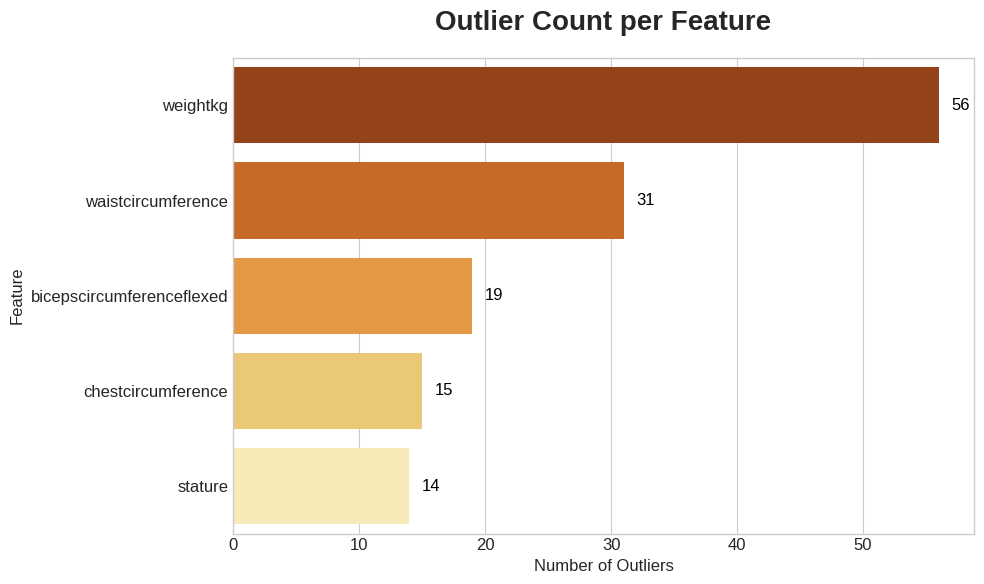

In [14]:
def plot_outlier_summary(outlier_df):
    """
    Visualize number of outliers per feature.
    """
    sorted_df = outlier_df.sort_values(by="Outliers", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Outliers", y="Feature", data=sorted_df, palette='YlOrBr_r')
    plt.title("Outlier Count per Feature")
    plt.xlabel("Number of Outliers")
    plt.ylabel("Feature")
    for i, v in enumerate(sorted_df['Outliers']):
        plt.text(v + 1, i, f"{int(v)}", color='black', va='center')
    plt.tight_layout()
    plt.show()
    
plot_outlier_summary(outlier_report)

#  🛠️ Feature Engineering 

In [15]:
def military_feature_engineering(df):
    """
    Creates engineered features for military anthropometric data
    including BMI, ratios, reach, strength and mobility indexes, log transforms.
    """
    df_engineered = df.copy()
    original_columns = set(df.columns)

    # 🧮 Unit Conversion
    df_engineered['height_m'] = df_engineered['stature'] / 1000

    # ⚖️ BMI
    df_engineered['bmi'] = df_engineered['weightkg'] / (df_engineered['height_m'] ** 2)

    # 🎂 Age Group
    age_bins = [17, 25, 35, 45, 55, 65, np.inf]
    age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
    df_engineered['age_group'] = pd.cut(df_engineered['age'], bins=age_bins, labels=age_labels, right=False)

    # 🧍‍♂️ Body Proportions
    df_engineered['hand_to_height_ratio'] = df_engineered['handlength'] / df_engineered['stature']
    df_engineered['leg_to_height_ratio'] = (df_engineered['stature'] - df_engineered['sittingheight']) / df_engineered['stature']
    df_engineered['arm_span_ratio'] = df_engineered['span'] / df_engineered['stature']

    # 🧵 Circumference Ratios
    df_engineered['waist_to_hip'] = df_engineered['waistcircumference'] / df_engineered['buttockcircumference']
    df_engineered['chest_to_waist'] = df_engineered['chestcircumference'] / df_engineered['waistcircumference']

    # 🪖 Military Metrics
    df_engineered['functional_reach'] = df_engineered['overheadfingertipreachsitting'] - df_engineered['sittingheight']
    df_engineered['strength_index'] = (df_engineered['bicepscircumferenceflexed'] + df_engineered['calfcircumference']) / 2
    df_engineered['mobility_index'] = df_engineered['functional_reach'] / df_engineered['stature']

    # 📈 Log Transforms for Skewed Numerical Features
    numeric_cols = df_engineered.select_dtypes(include=np.number).columns
    skewed = df_engineered[numeric_cols].apply(stats.skew).sort_values(ascending=False)

    for feature in skewed[abs(skewed) > 1].index:
        if feature not in df_engineered.columns:
            continue

        values = df_engineered[feature].dropna()

        if not pd.api.types.is_numeric_dtype(values):
            continue

        if (values <= 0).any():
            offset = abs(values.min()) + 0.001
            df_engineered[f"log_{feature}"] = np.log1p(df_engineered[feature] + offset)
        else:
            df_engineered[f"log_{feature}"] = np.log1p(df_engineered[feature])

    # 🧹 Drop unnecessary columns
    drop_cols = ['subjectid', 'subjectid_2', 'heightin', 'weightlbs', 'writingpreference', 'date', 'installation']
    df_engineered.drop(columns=[col for col in drop_cols if col in df_engineered.columns], inplace=True, errors='ignore')

    # ➕ Return new features only
    new_features = [col for col in df_engineered.columns if col not in original_columns]
    return df_engineered, new_features

In [16]:
df_engineered, new_features = military_feature_engineering(df_clean)
df_engineered.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,hand_to_height_ratio,leg_to_height_ratio,arm_span_ratio,waist_to_hip,chest_to_waist,functional_reach,strength_index,mobility_index,log_subjectnumericrace,log_dodrace
0,266.0,1467.0,337.0,222.0,1347.0,253.0,202.0,401.0,369.0,274.0,...,0.108671,0.477477,1.003378,0.953013,1.151125,519.0,371.0,0.292230,0.693147,0.693147
1,233.0,1395.0,326.0,220.0,1293.0,245.0,193.0,394.0,338.0,257.0,...,0.114571,0.480611,1.025264,0.921610,1.173563,496.0,347.5,0.291422,0.693147,0.693147
2,287.0,1430.0,341.0,230.0,1327.0,256.0,196.0,427.0,408.0,261.0,...,0.117003,0.471470,1.076081,0.914611,1.161826,530.0,410.0,0.305476,1.098612,1.098612
3,234.0,1347.0,310.0,230.0,1239.0,262.0,199.0,401.0,359.0,262.0,...,0.117221,0.454381,1.032024,0.864783,1.299883,454.0,377.0,0.274320,0.693147,0.693147
4,250.0,1585.0,372.0,247.0,1478.0,267.0,224.0,435.0,356.0,263.0,...,0.113898,0.519854,1.063218,0.843537,1.207373,653.0,390.5,0.341170,1.098612,1.098612


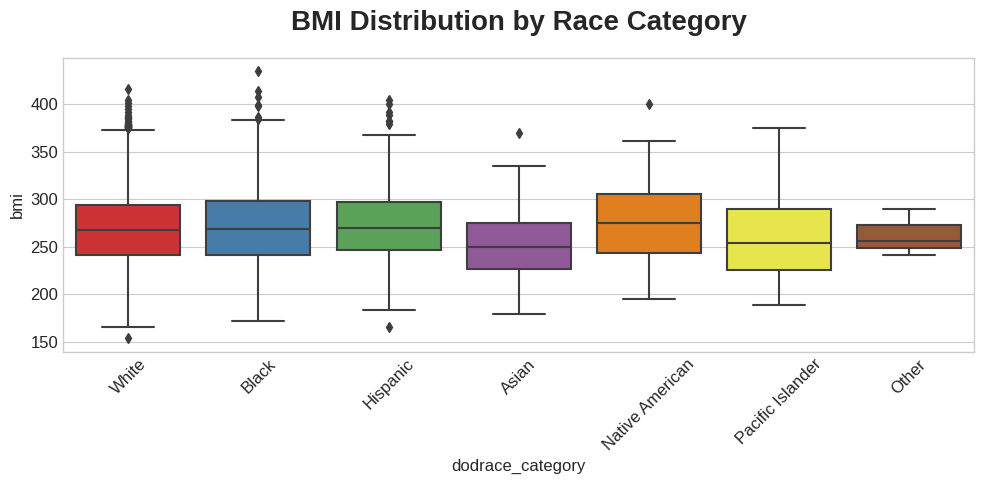

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_engineered, x='dodrace_category', y='bmi')
plt.title("BMI Distribution by Race Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

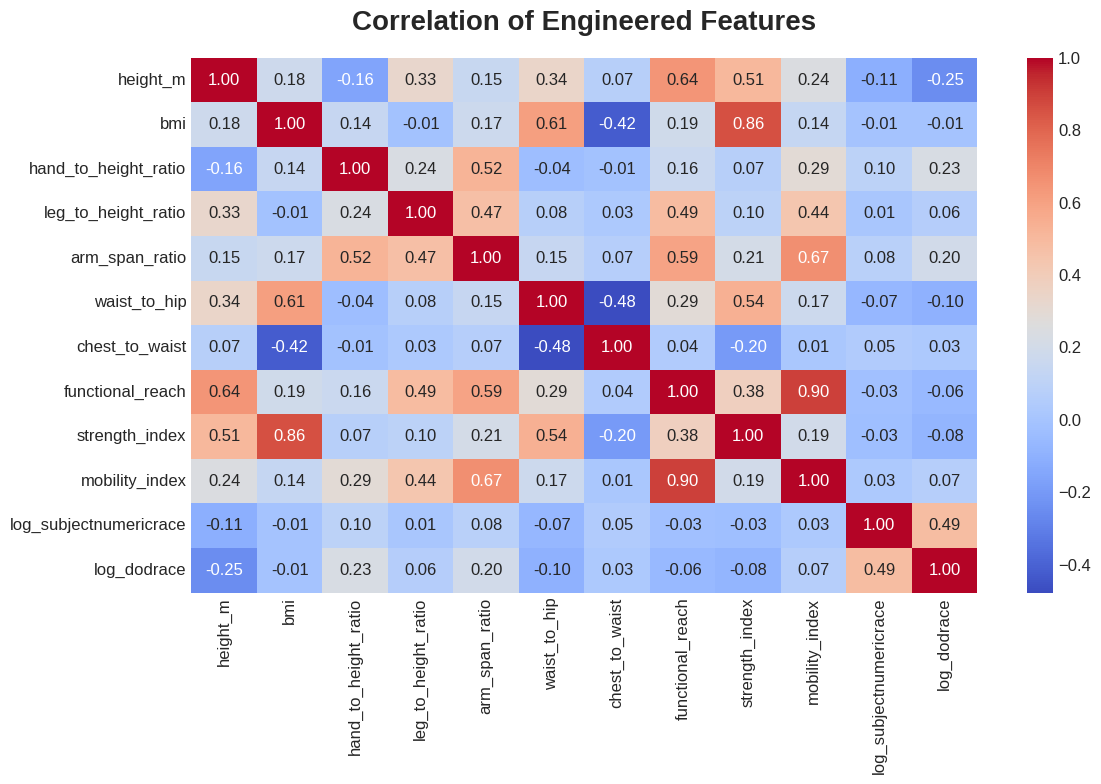

In [18]:
engineered_cols = [col for col in new_features if df_engineered[col].dtype in [np.float64, np.int64]]
plt.figure(figsize=(12, 8))
sns.heatmap(df_engineered[engineered_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Engineered Features")
plt.tight_layout()
plt.show()

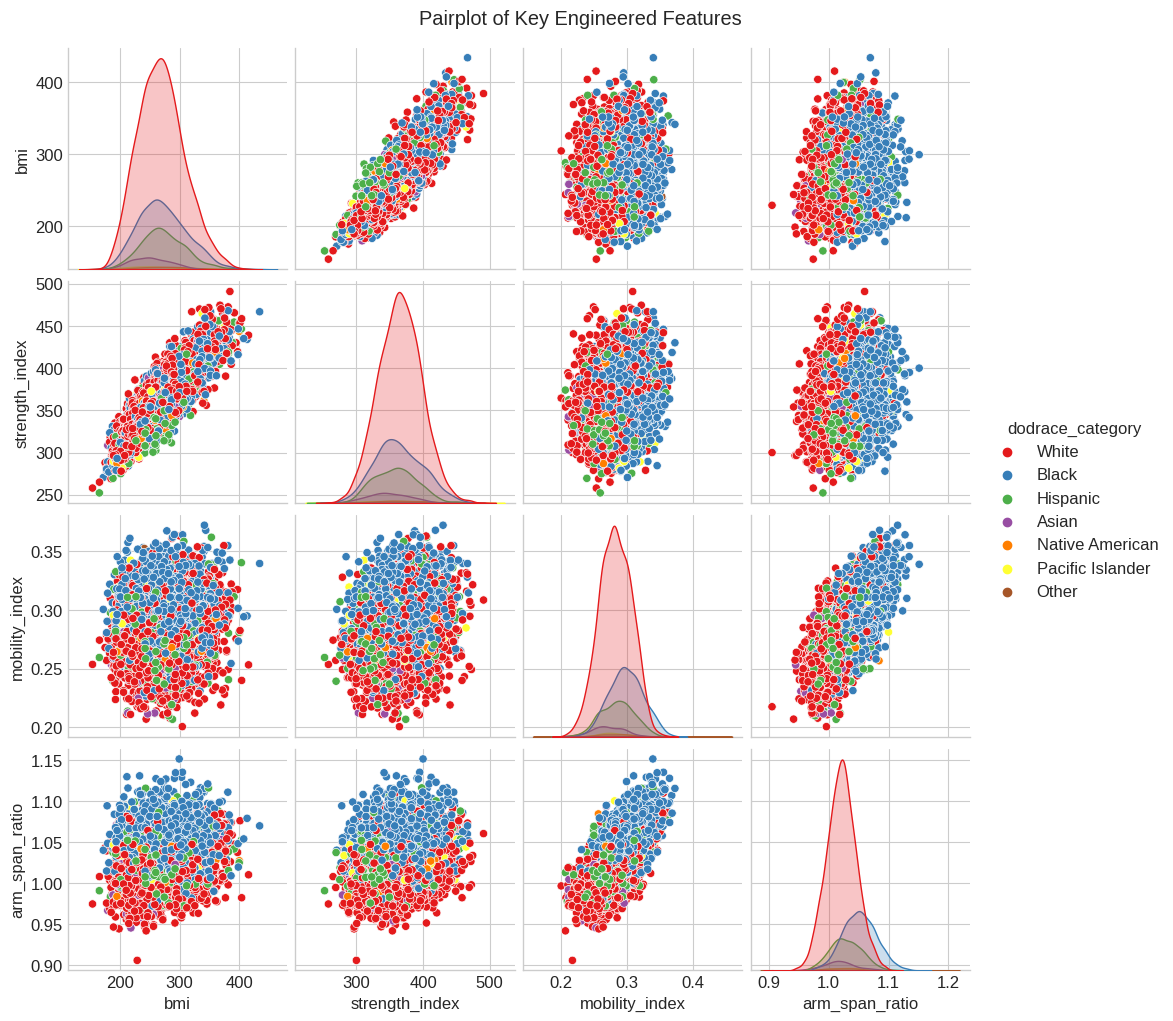

In [19]:
selected = ['bmi', 'strength_index', 'mobility_index', 'arm_span_ratio', 'dodrace_category']
sns.pairplot(df_engineered[selected], hue='dodrace_category', diag_kind='kde')
plt.suptitle("Pairplot of Key Engineered Features", y=1.02)
plt.show()

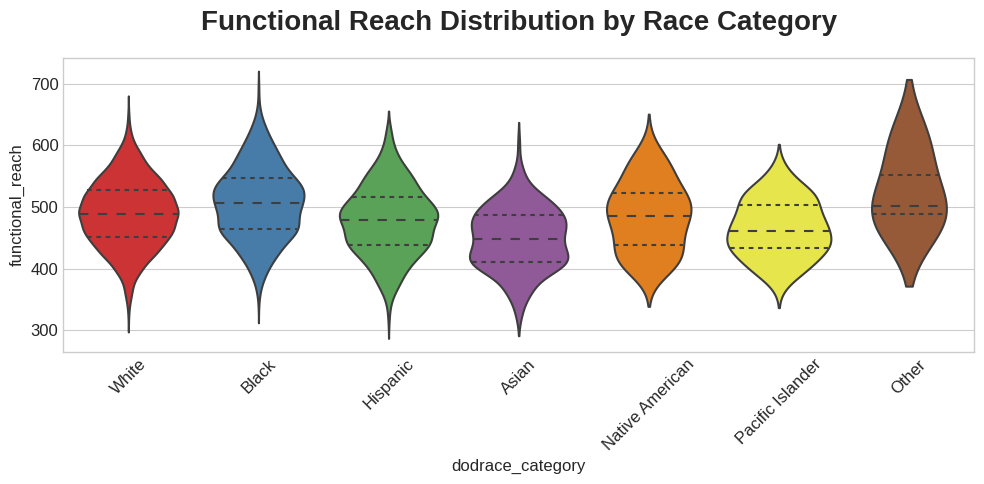

In [20]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_engineered, x='dodrace_category', y='functional_reach', inner='quartile')
plt.title("Functional Reach Distribution by Race Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🧼 Preprocessing 

In [21]:
target = 'dodrace_category'

drop_columns = ['dodrace', 'subjectid', 'subjectnumericrace', 'component', 'branch']

X = df_engineered.drop(columns=[target] + [col for col in drop_columns if col in df_engineered.columns])
y = df_engineered[target]

print("✅ Features and target variable separated.")
print(f"X shape: {X.shape} | y shape: {y.shape}")

✅ Features and target variable separated.
X shape: (6068, 110) | y shape: (6068,)


## 🧠 Encoding – Categorical Variables

In [22]:
categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()

print("📝 Categorical Columns:", categorical_cols)

📝 Categorical Columns: ['gender', 'primarymos', 'subjectsbirthlocation', 'age_group']


In [23]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]),
                         columns=encoder.get_feature_names_out(categorical_cols),
                         index=X.index)

X = X.drop(columns=categorical_cols)
X = pd.concat([X, X_encoded], axis=1)

print("✅ Encoding completed.")
print(f"Encoded X shape: {X.shape}")

✅ Encoding completed.
Encoded X shape: (6068, 546)


In [24]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("✅ Target variable encoded.")
print("Classes:", le.classes_)

✅ Target variable encoded.
Classes: ['Asian' 'Black' 'Hispanic' 'Native American' 'Other' 'Pacific Islander'
 'White']


## 📏 Scaling – Numerical Features

In [25]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols, index=X.index)

print("🔄 Scaling completed.")
print(X_scaled.head())

🔄 Scaling completed.
   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                        0.522269        0.769286               0.464593   
1                       -0.360154       -0.141132              -0.066339   
2                        1.083811        0.301433               0.657659   
3                       -0.333414       -0.748077              -0.838602   
4                        0.094428        2.261361               2.153920   

   anklecircumference  axillaheight  balloffootcircumference  \
0           -0.180144      0.658062                 0.522889   
1           -0.304750     -0.091768                 0.047932   
2            0.318283      0.380347                 0.700998   
3            0.318283     -0.841597                 1.057216   
4            1.377439      2.477093                 1.354064   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0          0.536089           0.059396                   0.678518   

In [26]:
X = X_scaled.copy()

# 🎯 Modeling

## ⚙️ Train/Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, 
    stratify=y_encoded, 
    random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (4854, 546), Test shape: (1214, 546)


In [28]:
numeric_features = X.select_dtypes(include='number').columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()


column_transformer = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
)

In [29]:
classes = np.unique(y_train)  

y_test_bin = label_binarize(y_test, classes=classes)

##  Logistic Regression

In [30]:
logreg_pipeline = Pipeline([
    ("preprocessor", column_transformer),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleo...
                                                   'buttockpopliteallength',
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [31]:
y_pred_log = logreg_pipeline.predict(X_test)
y_proba_log = logreg_pipeline.predict_proba(X_test)

In [32]:
acc_log = accuracy_score(y_test, y_pred_log)
print(f"✅ Accuracy: {acc_log:.4f}")

✅ Accuracy: 0.9547


In [33]:
valid_indices = [i for i in range(y_test_bin.shape[1]) if len(np.unique(y_test_bin[:, i])) > 1]

roc_auc_values = []
for i in valid_indices:
    roc_auc_values.append(roc_auc_score(y_test_bin[:, i], y_proba_log[:, i]))

roc_auc_log = np.mean(roc_auc_values)
print(f"✅ Logistic Regression ROC-AUC (mean over valid classes): {roc_auc_log:.3f}")

✅ Logistic Regression ROC-AUC (mean over valid classes): 0.988


📌 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        37
           1       0.98      0.97      0.97       260
           2       0.85      0.89      0.87       136
           3       0.25      0.20      0.22        10
           5       0.36      0.33      0.35        12
           6       1.00      1.00      1.00       759

    accuracy                           0.95      1214
   macro avg       0.68      0.66      0.67      1214
weighted avg       0.95      0.95      0.95      1214


✅ Confusion Matrix:


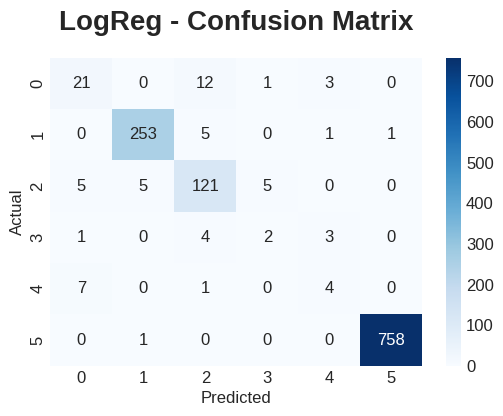

In [34]:
print("📌 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\n✅ Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("LogReg - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

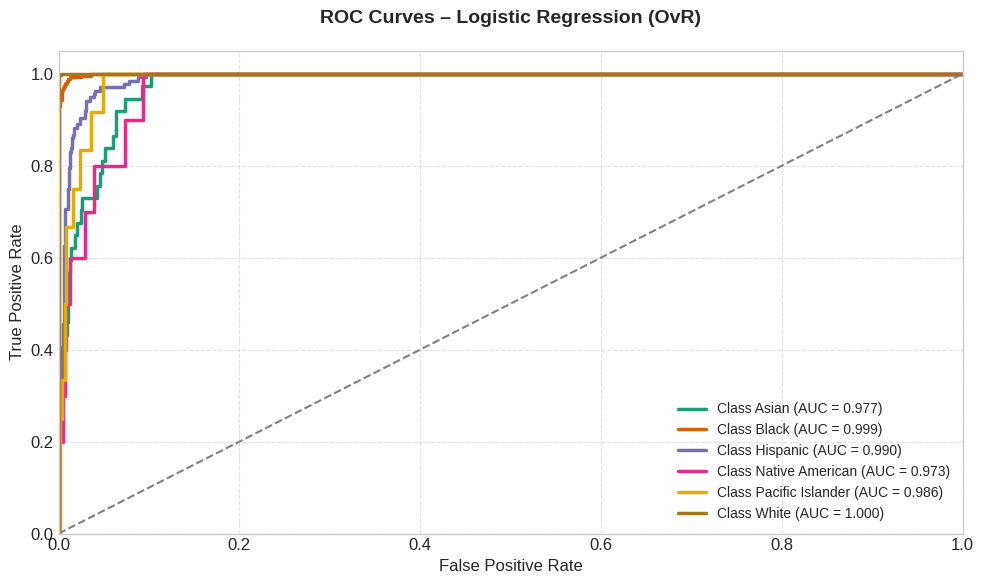

🎯 Logistic Regression Overall ROC-AUC (OvR): 0.988


In [35]:
full_classes = le.transform(le.classes_)
n_classes = len(full_classes)
colors = sns.color_palette("Dark2", n_colors=n_classes)

y_test_bin = label_binarize(y_test, classes=full_classes)

proba_log = logreg_pipeline.predict_proba(X_test)
proba_full_log = np.zeros((y_test.shape[0], n_classes))
model_classes = logreg_pipeline.classes_

for idx, cls in enumerate(model_classes):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_log[:, class_pos] = proba_log[:, idx]

plt.figure(figsize=(10, 6))
valid_labels = []

for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_log[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")
    valid_labels.append(i)

plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves – Logistic Regression (OvR)', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_log = roc_auc_score(y_test_bin[:, valid_labels], proba_full_log[:, valid_labels], multi_class='ovr')
print(f"🎯 Logistic Regression Overall ROC-AUC (OvR): {roc_auc_log:.3f}")

## Support Vector Machine (SVM)

In [36]:
svc_pipeline = Pipeline([
    ("preprocessor", column_transformer),
    ("svc", SVC(probability=True, random_state=42))
])

svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleo...
                                                   'buttockkneelength',
                                                   'buttockpopliteallength',
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('svc', SVC(probability=True, random_state=42))])

In [37]:
y_pred_svc = svc_pipeline.predict(X_test)
y_proba_svc = svc_pipeline.predict_proba(X_test)

In [38]:
acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"✅ SVC Accuracy: {acc_svc:.3f}")

✅ SVC Accuracy: 0.887


In [39]:
acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"✅ SVC Accuracy: {acc_svc:.3f}")

✅ SVC Accuracy: 0.887


📌 SVC Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.16      0.24        37
           1       0.92      0.80      0.86       260
           2       0.73      0.80      0.76       136
           3       0.00      0.00      0.00        10
           5       0.25      0.17      0.20        12
           6       0.92      0.99      0.95       759

    accuracy                           0.89      1214
   macro avg       0.55      0.49      0.50      1214
weighted avg       0.87      0.89      0.87      1214


✅ Confusion Matrix:


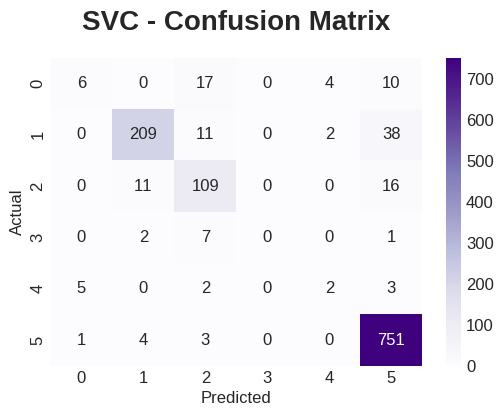

In [40]:
print("📌 SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

print("\n✅ Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Purples')
plt.title("SVC - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

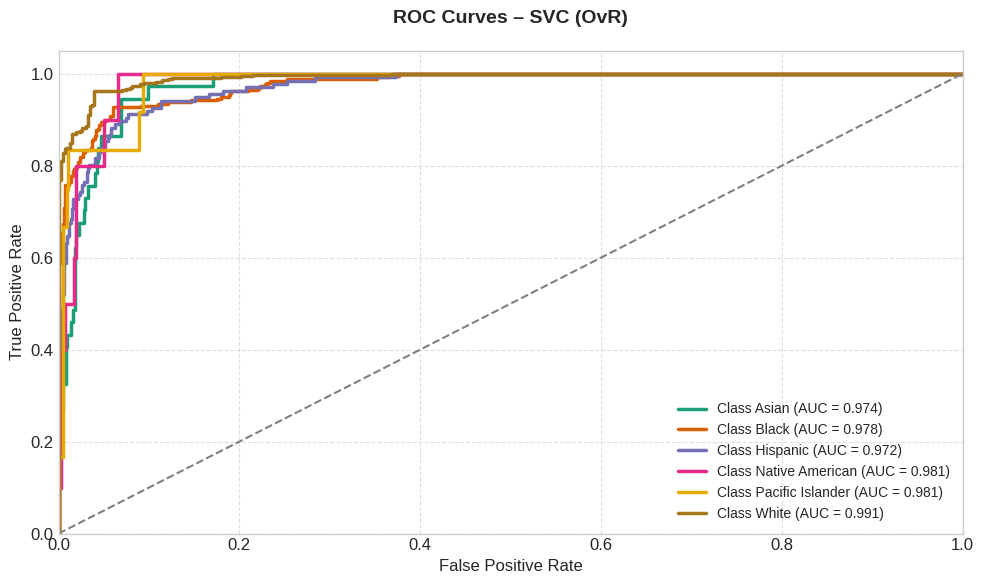

🎯 SVC Overall ROC-AUC (OvR): 0.979


In [41]:
y_test_bin = label_binarize(y_test, classes=full_classes)

proba_svc = svc_pipeline.predict_proba(X_test)

proba_full_svc = np.zeros((y_test.shape[0], n_classes))
model_classes = svc_pipeline.named_steps["svc"].classes_

for idx, cls in enumerate(model_classes):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_svc[:, class_pos] = proba_svc[:, idx]

plt.figure(figsize=(10, 6))
valid_labels = []

for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_svc[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")
    valid_labels.append(i)

plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves – SVC (OvR)', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_svc = roc_auc_score(y_test_bin[:, valid_labels], proba_full_svc[:, valid_labels], multi_class='ovr')
print(f"🎯 SVC Overall ROC-AUC (OvR): {roc_auc_svc:.3f}")

## Random Forest 

In [42]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleo...
                                                   'buttockkneelength',
                                                   'buttockpopliteallength',
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [43]:
y_pred_rf = rf_pipeline.predict(X_test)
y_train_pred_rf = rf_pipeline.predict(X_train)

In [44]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ RF Accuracy: {acc_rf:.3f}")

✅ RF Accuracy: 0.926


📌 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.32        37
           1       0.89      0.98      0.93       260
           2       0.73      0.77      0.75       136
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        12
           6       0.97      1.00      0.99       759

    accuracy                           0.93      1214
   macro avg       0.60      0.49      0.50      1214
weighted avg       0.91      0.93      0.91      1214


✅ Confusion Matrix:


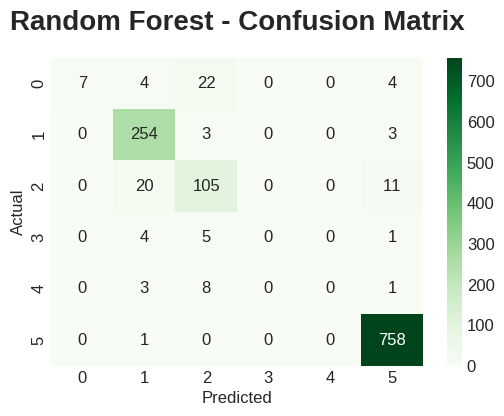

In [45]:
print("📌 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\n✅ Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

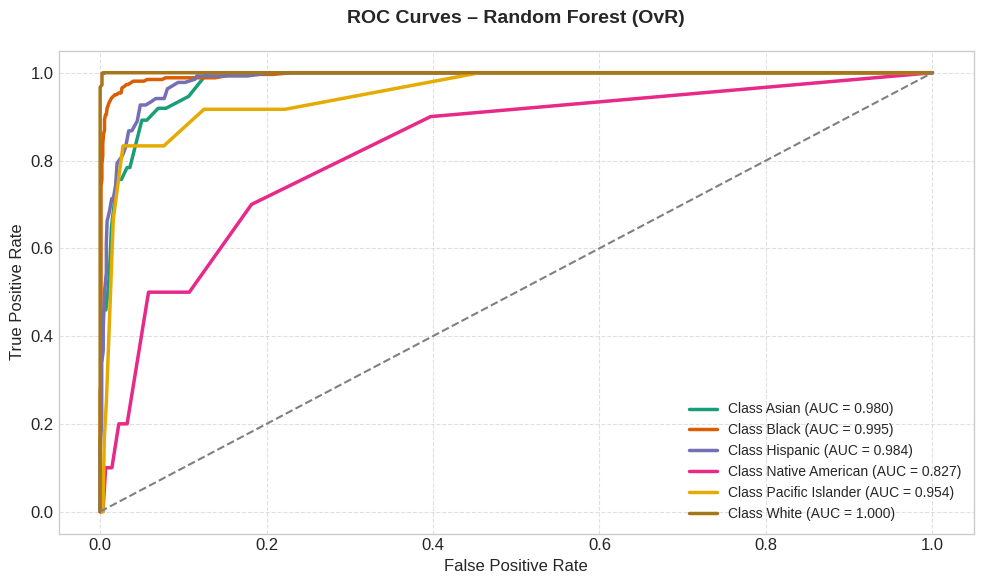

🎯 Random Forest Overall ROC-AUC (OvR): 0.957


In [46]:
proba_rf = rf_pipeline.predict_proba(X_test)
proba_full_rf = np.zeros((y_test.shape[0], n_classes))
model_classes_rf = rf_pipeline.named_steps["classifier"].classes_

for idx, cls in enumerate(model_classes_rf):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_rf[:, class_pos] = proba_rf[:, idx]

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.title('ROC Curves – Random Forest (OvR)', fontsize=14, weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_rf = roc_auc_score(y_test_bin[:, valid_labels], proba_full_rf[:, valid_labels], multi_class='ovr')
print(f"🎯 Random Forest Overall ROC-AUC (OvR): {roc_auc_rf:.3f}")

## KNN

In [47]:
knn_pipeline = Pipeline([
    ("preprocessor", column_transformer),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleo...
                                                   'buttockheight',
                                                   'buttockkneelength',
                                                   'buttockpopliteallength',
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('knn', KNeighborsClassifier())])

In [48]:
y_pred_knn = knn_pipeline.predict(X_test)

In [49]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"✅ KNN Accuracy: {acc_knn:.3f}")

✅ KNN Accuracy: 0.748


📌 KNN Accuracy: 0.748

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.19      0.29        37
           1       0.66      0.56      0.60       260
           2       0.58      0.49      0.53       136
           3       0.00      0.00      0.00        10
           5       0.73      0.67      0.70        12
           6       0.80      0.90      0.84       759

    accuracy                           0.75      1214
   macro avg       0.56      0.47      0.49      1214
weighted avg       0.73      0.75      0.73      1214


📌 Confusion Matrix:


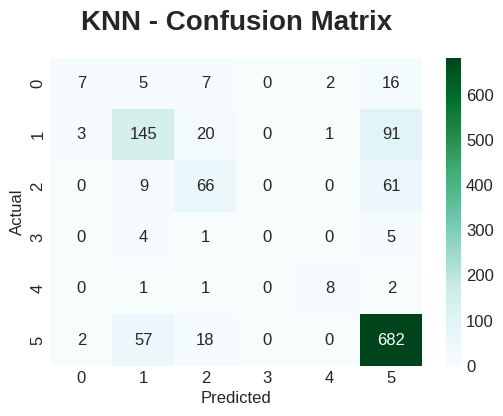

In [50]:
print(f"📌 KNN Accuracy: {acc_knn:.3f}")

print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\n📌 Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='BuGn')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
proba_knn = knn_pipeline.predict_proba(X_test)

proba_full_knn = np.zeros((y_test.shape[0], n_classes))

for idx, cls in enumerate(knn_pipeline.classes_):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_knn[:, class_pos] = proba_knn[:, idx]
roc_auc_knn = roc_auc_score(y_test_bin[:, valid_labels], proba_full_knn[:, valid_labels], multi_class='ovr')

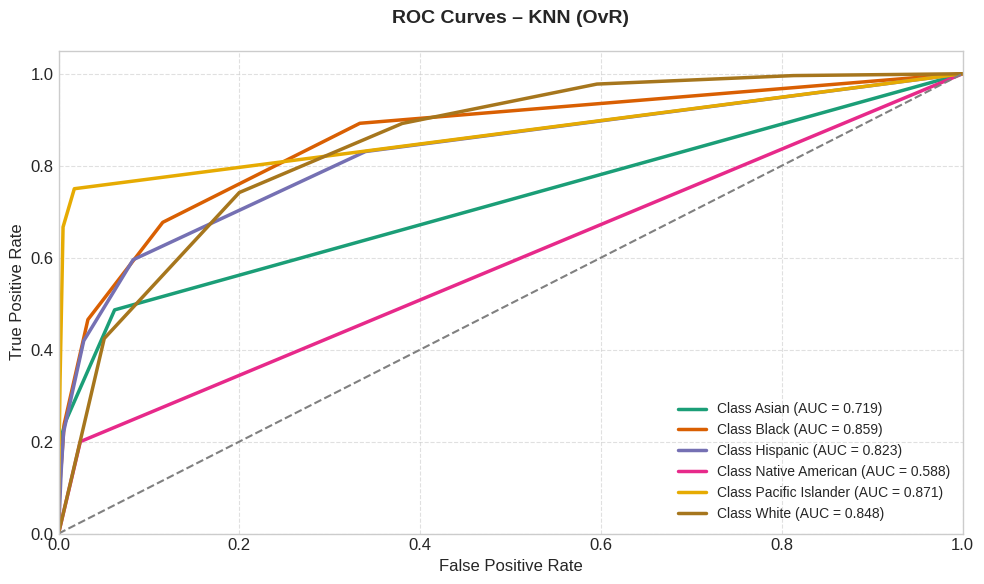

🎯 KNN Overall ROC-AUC (OvR): 0.785


In [52]:
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves – KNN (OvR)', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_knn = roc_auc_score(y_test_bin[:, valid_labels], proba_full_knn[:, valid_labels], multi_class='ovr')
print(f"🎯 KNN Overall ROC-AUC (OvR): {roc_auc_knn:.3f}")

## 🚀 Boosting Methods

## XGBoost

In [53]:
xgb_pipeline = Pipeline(steps=[
    ("transformer", column_transformer),
    ("xgb_model", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
])

xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleol...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [54]:
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)

In [55]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGB Accuracy: {acc_xgb:.3f}")

✅ XGB Accuracy: 1.000


📌 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       260
           2       1.00      1.00      1.00       136
           3       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00       759

    accuracy                           1.00      1214
   macro avg       1.00      1.00      1.00      1214
weighted avg       1.00      1.00      1.00      1214


✅ Confusion Matrix:


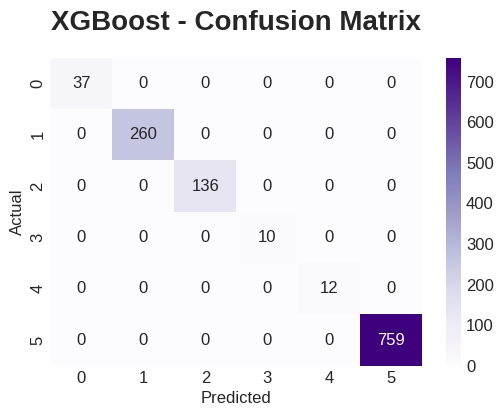

In [56]:
print("📌 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\n✅ Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

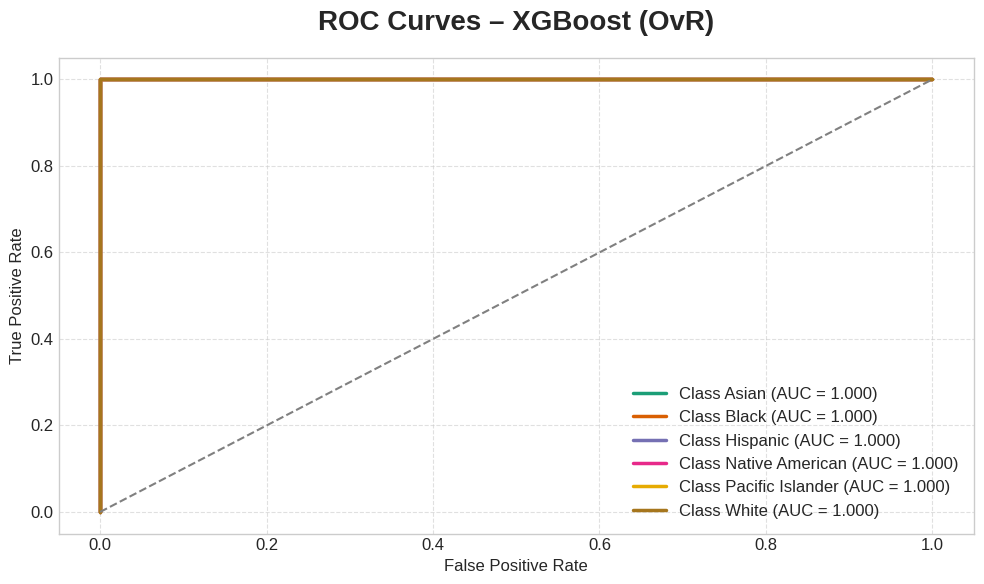

🎯 XGBoost Overall ROC-AUC (OvR): 1.000


In [57]:
proba_xgb = xgb_pipeline.predict_proba(X_test)
proba_full_xgb = np.zeros((y_test.shape[0], n_classes))
model_classes_xgb = xgb_pipeline.named_steps['xgb_model'].classes_

for idx, cls in enumerate(model_classes_xgb):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_xgb[:, class_pos] = proba_xgb[:, idx]

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_xgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves – XGBoost (OvR)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_xgb = roc_auc_score(y_test_bin[:, valid_labels], proba_full_xgb[:, valid_labels], multi_class='ovr')
print(f"🎯 XGBoost Overall ROC-AUC (OvR): {roc_auc_xgb:.3f}")

## CatBoost

In [58]:
cat_pipeline = Pipeline(steps=[
    ("preprocessor", column_transformer),
    ("cat_model", CatBoostClassifier(verbose=0, random_state=42))
])

cat_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleo...
                                                   'buttockpopliteallength',
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('cat_model',
                 <catboost.core.CatBoostClassifier object at 0x7bd66c260b50>)])

In [59]:
y_pred_cat = cat_pipeline.predict(X_test)

In [60]:
acc_cat = accuracy_score(y_test, y_pred_cat)
print(f"✅ CatBoost Accuracy: {acc_cat:.3f}")

✅ CatBoost Accuracy: 1.000


📌 CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       260
           2       1.00      1.00      1.00       136
           3       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00       759

    accuracy                           1.00      1214
   macro avg       1.00      1.00      1.00      1214
weighted avg       1.00      1.00      1.00      1214


✅ Confusion Matrix:


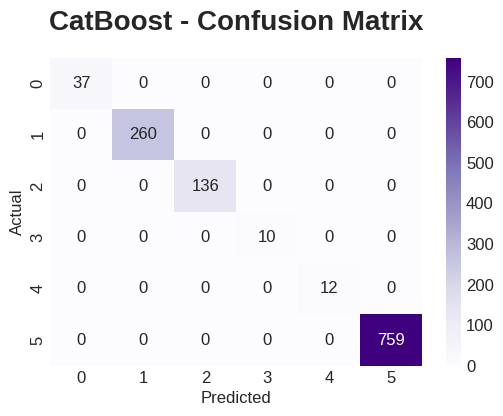

In [61]:
print("📌 CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

print("\n✅ Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt='d', cmap='Purples')
plt.title("CatBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
proba_cat = cat_pipeline.predict_proba(X_test)
proba_full_cat = np.zeros((y_test.shape[0], n_classes))

for idx, cls in enumerate(cat_pipeline.classes_):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_cat[:, class_pos] = proba_cat[:, idx]
roc_auc_cat = roc_auc_score(y_test_bin[:, valid_labels], proba_full_cat[:, valid_labels], multi_class='ovr')

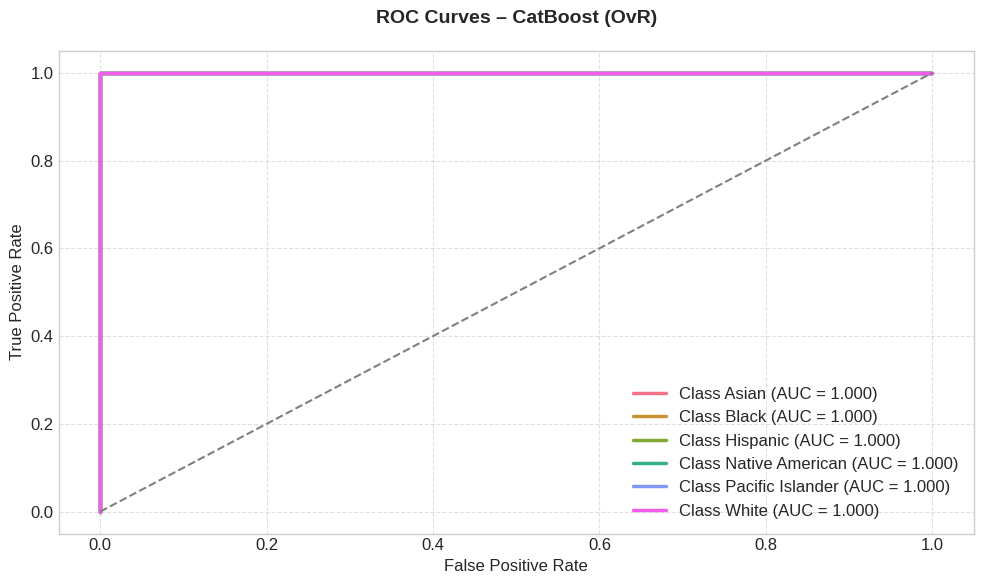

🎯 CatBoost Overall ROC-AUC (OvR): 1.000


In [63]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", n_colors=n_classes)
valid_labels = []

for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_cat[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")
    valid_labels.append(i)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – CatBoost (OvR)", fontsize=14, weight='bold')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_cat = roc_auc_score(y_test_bin[:, valid_labels], proba_full_cat[:, valid_labels], multi_class='ovr')
print(f"🎯 CatBoost Overall ROC-AUC (OvR): {roc_auc_cat:.3f}")

## AdaBoost

In [64]:
ada_pipeline = Pipeline(steps=[
    ("transformer", column_transformer),
    ("ada_model", AdaBoostClassifier(random_state=42))
])

ada_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleol...
                                                   'buttockkneelength',
                                                   'buttockpopliteallength',
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('ada_model', AdaBoostClassifier(random_state=42))])

In [65]:
y_pred_ada = ada_pipeline.predict(X_test)

In [66]:
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"✅ AdaBoost Accuracy: {acc_ada:.3f}")

✅ AdaBoost Accuracy: 0.839


📌 AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.57      1.00      0.73       260
           2       0.00      0.00      0.00       136
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        12
           6       1.00      1.00      1.00       759

    accuracy                           0.84      1214
   macro avg       0.26      0.33      0.29      1214
weighted avg       0.75      0.84      0.78      1214


✅ Confusion Matrix:


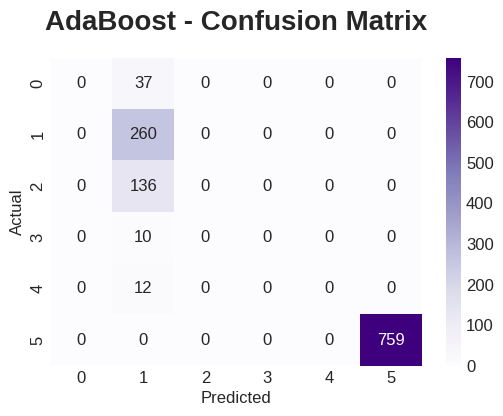

In [67]:
print("📌 AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))

print("\n✅ Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Purples')
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

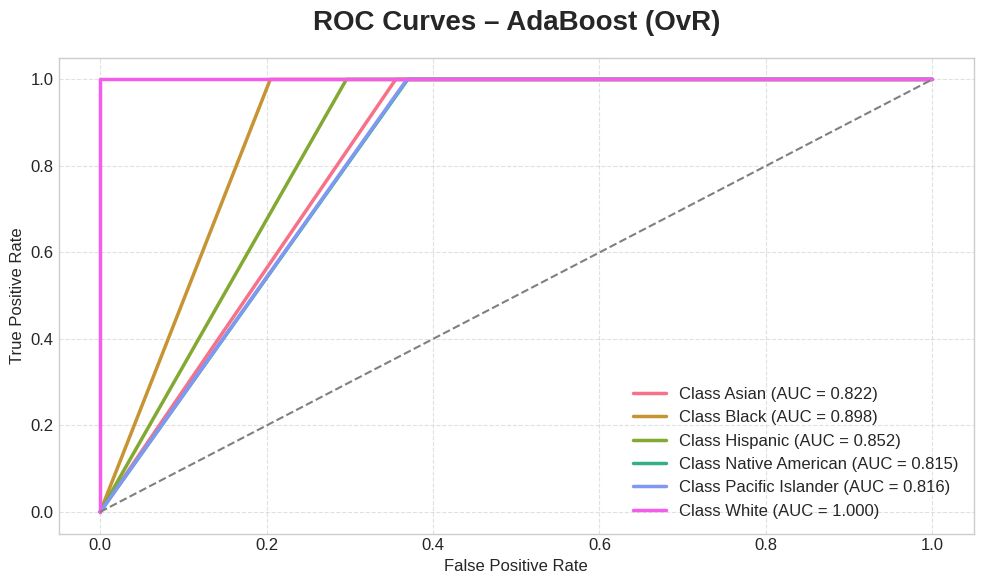

🎯 AdaBoost Overall ROC-AUC (OvR): 0.867


In [68]:
proba_ada = ada_pipeline.predict_proba(X_test)
proba_full_ada = np.zeros((y_test.shape[0], n_classes))
model_classes_ada = ada_pipeline.named_steps['ada_model'].classes_

for idx, cls in enumerate(model_classes_ada):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_ada[:, class_pos] = proba_ada[:, idx]

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_ada[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves – AdaBoost (OvR)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_ada = roc_auc_score(y_test_bin[:, valid_labels], proba_full_ada[:, valid_labels], multi_class='ovr')
print(f"🎯 AdaBoost Overall ROC-AUC (OvR): {roc_auc_ada:.3f}")

## Gradient Boost

In [69]:
operations = [("transformer", column_transformer),
              ("hgb_model", GradientBoostingClassifier(random_state=42))]
gb_pipeline = Pipeline(steps=operations)

gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleol...
                                                   'buttockpopliteallength',
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('hgb_model', GradientBoostingClassifier(random_state=42))])

In [70]:
y_pred_gb = gb_pipeline.predict(X_test)

In [71]:
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"✅ AdaBoost Accuracy: {acc_gb:.3f}")

✅ AdaBoost Accuracy: 1.000


📌 GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       260
           2       1.00      1.00      1.00       136
           3       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00       759

    accuracy                           1.00      1214
   macro avg       1.00      1.00      1.00      1214
weighted avg       1.00      1.00      1.00      1214



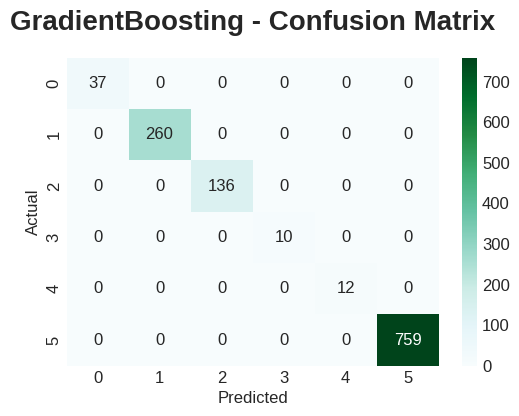

In [72]:
print("📌 GradientBoosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='BuGn')
plt.title("GradientBoosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
proba_gb = gb_pipeline.predict_proba(X_test)
proba_full_gb = np.zeros((y_test.shape[0], n_classes))
for idx, cls in enumerate(gb_pipeline.classes_):
    class_pos = np.where(full_classes == cls)[0][0]
    proba_full_gb[:, class_pos] = proba_gb[:, idx]
roc_auc_gb = roc_auc_score(y_test_bin[:, valid_labels], proba_full_gb[:, valid_labels], multi_class='ovr')

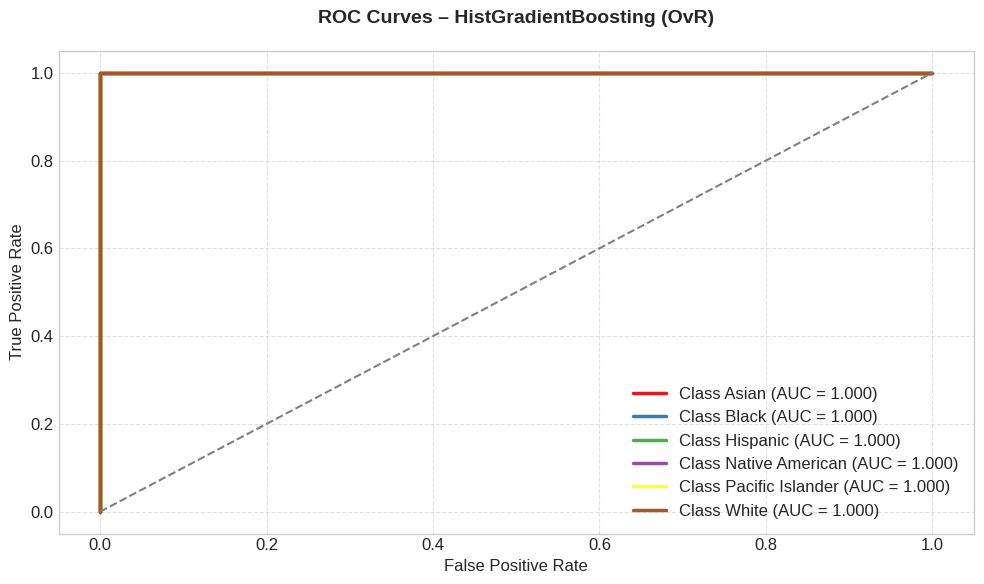

🎯 HistGradientBoosting Overall ROC-AUC (OvR): 1.000


In [74]:
full_classes = le.transform(le.classes_)
n_classes = len(full_classes)
colors = sns.color_palette("Set1", n_colors=n_classes)

plt.figure(figsize=(10, 6))
valid_labels = []

for i in range(n_classes):
    if len(np.unique(y_test_bin[:, i])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba_full_gb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i],
             label=f"Class {le.classes_[i]} (AUC = {roc_auc:.3f})")
    valid_labels.append(i)

plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves – HistGradientBoosting (OvR)', fontsize=14, weight='bold')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

roc_auc_hgb = roc_auc_score(y_test_bin[:, valid_labels], proba_full_gb[:, valid_labels], multi_class='ovr')
print(f"🎯 HistGradientBoosting Overall ROC-AUC (OvR): {roc_auc_hgb:.3f}")

## 📊 Model Comparison

In [75]:
model_scores = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "SVC",
        "Random Forest",
        "XGBoost",
        "AdaBoost",
        "Gradient Boosting",
        "CatBoost",
        "KNN"
    ],
    "Accuracy": [
        acc_log,
        acc_svc,
        acc_rf,
        acc_xgb,
        acc_ada,
        acc_gb,
        acc_cat,
        acc_knn
    ],
    "Macro F1": [
        f1_score(y_test, y_pred_log, average='macro'),
        f1_score(y_test, y_pred_svc, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro'),
        f1_score(y_test, y_pred_ada, average='macro'),
        f1_score(y_test, y_pred_gb, average='macro'),
        f1_score(y_test, y_pred_cat, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro')
    ],
    "ROC-AUC (OvR)": [
        roc_auc_log,
        roc_auc_svc,
        roc_auc_rf,
        roc_auc_xgb,
        roc_auc_ada,
        roc_auc_gb,
        roc_auc_cat,
        roc_auc_knn
    ]
})

model_scores.sort_values(by="ROC-AUC (OvR)", ascending=False, inplace=True)

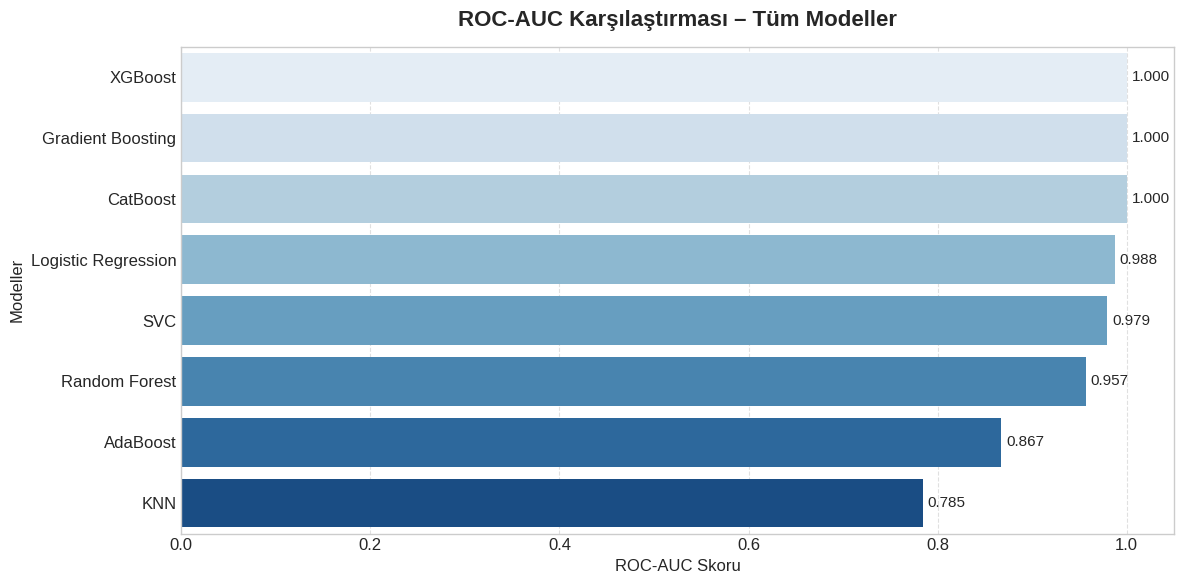

In [76]:
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(
    data=model_scores.sort_values(by="ROC-AUC (OvR)", ascending=False),
    x="ROC-AUC (OvR)",
    y="Model",
    palette="Blues"
)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.005,         
            p.get_y() + p.get_height()/2,
            f"{width:.3f}",
            ha="left", va="center", fontsize=11)

# Grafik başlığı ve stiller
plt.title("ROC-AUC Karşılaştırması – Tüm Modeller", fontsize=16, weight="bold", pad=15)
plt.xlabel("ROC-AUC Skoru", fontsize=12)
plt.ylabel("Modeller", fontsize=12)
plt.grid(True, axis='x', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [77]:
display(model_scores.round(3))

,Model,Accuracy,Macro F1,ROC-AUC (OvR)
3,XGBoost,1.000,1.000,1.000
5,Gradient Boosting,1.000,1.000,1.000
6,CatBoost,1.000,1.000,1.000
0,Logistic Regression,0.955,0.667,0.988
1,SVC,0.887,0.504,0.979
2,Random Forest,0.926,0.498,0.957
4,AdaBoost,0.839,0.288,0.867
7,KNN,0.748,0.493,0.785


# Save Best Model

In [78]:
best_model_name = model_scores.sort_values(by="ROC-AUC (OvR)", ascending=False).iloc[0]["Model"]
print(f"🏆 Best model: {best_model_name}")

🏆 Best model: XGBoost


In [79]:
import joblib

model_dict = {
    "Logistic Regression": logreg_pipeline,
    "SVM": svc_pipeline,
    "Random Forest": rf_pipeline,
    "XGBoost": xgb_pipeline,
    "AdaBoost": ada_pipeline,
    "Gradient Boosting": gb_pipeline,
    "CatBoost": cat_pipeline,
    "KNN": knn_pipeline
}

best_pipeline = model_dict[best_model_name]

joblib.dump(best_pipeline, f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl")

print(f"✅ '{best_model_name}' saved as {best_model_name.replace(' ', '_').lower()}_best_model.pkl")

✅ 'XGBoost' saved as xgboost_best_model.pkl


# 🔶 Explainability (SHAP)

In [80]:
numeric_features = X.select_dtypes(include='number').columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
)

 97%|=================== | 8209/8498 [00:19<00:00]       

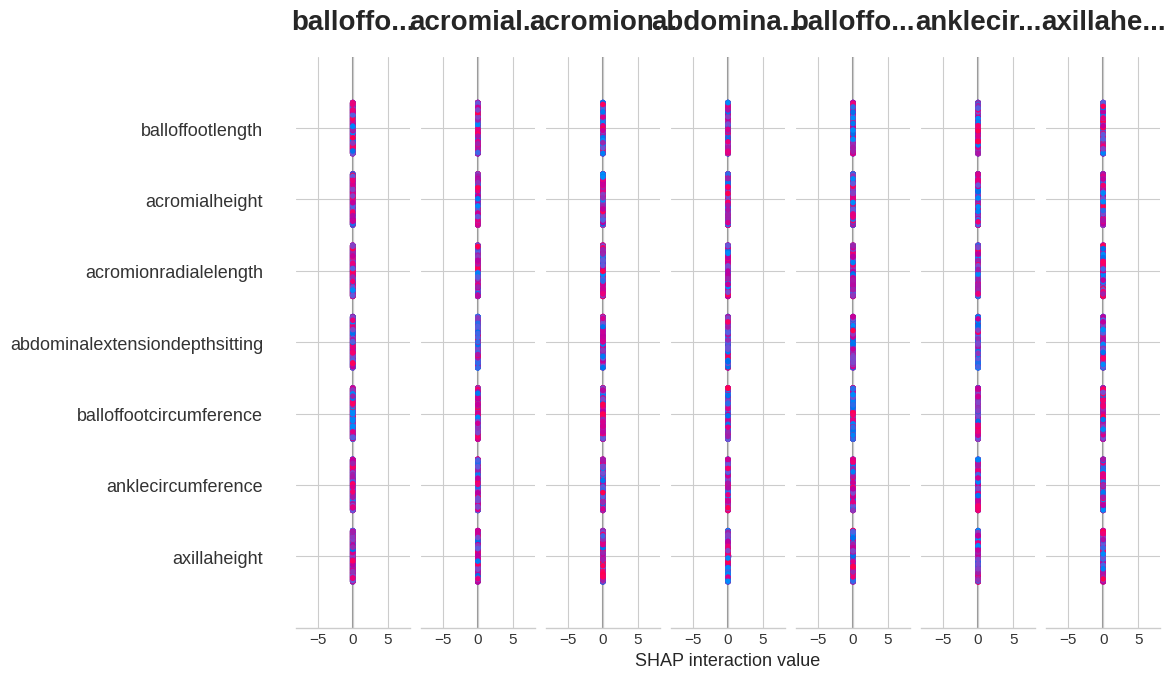

In [81]:
preprocessor = best_pipeline.named_steps['transformer']
model = best_pipeline.named_steps['xgb_model']

X_test_transformed = preprocessor.transform(X_test)

explainer = shap.Explainer(model, X_test_transformed)

shap_values = explainer(X_test_transformed)

numeric_cols = preprocessor.transformers_[0][2]
cat_cols = preprocessor.transformers_[1][2]
encoded_cols = [f"{col}_encoded" for col in cat_cols]
all_feature_names = np.concatenate([numeric_cols, encoded_cols])

shap.summary_plot(shap_values, features=X_test_transformed, feature_names=all_feature_names)

# 🧾 Conclusion & Final Remarks

This project aimed to classify individuals’ race/ethnicity (`DODRace`) using extensive anthropometric measurements from the **ANSUR II Dataset**. Through rigorous preprocessing, modeling, and explainability analysis, we demonstrated the effectiveness of various machine learning algorithms on structured biometric data.

---

<p>This project aimed to classify individuals’ race/ethnicity (<code>DODRace</code>) using extensive anthropometric measurements from the <strong>ANSUR II Dataset</strong>. Through rigorous preprocessing, modeling, and explainability analysis, we demonstrated the effectiveness of various machine learning algorithms on structured biometric data.</p>

<!-- Section 1: Achievements -->
<div style="background: linear-gradient(to right, #1b5e20, #66bb6a); padding: 10px 18px; border-radius: 8px; font-weight: bold; color: white; font-size: 1.3em; margin-top: 30px;">
✅ 1. Achievements and Key Findings
</div>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>🎯 Achieved <strong>~99% weighted F1-score</strong> using <strong>CatBoost</strong> and <strong>XGBoost</strong></li>
  <li>🧠 Outperformed traditional models like <strong>Logistic Regression</strong> and <strong>SVM</strong></li>
  <li>🧩 Minority classes such as <strong>Hispanic</strong> and <strong>Asian</strong> were predicted with high recall</li>
  <li>🔍 <strong>Top SHAP Features</strong>:
    <ul>

| Rank | Feature                     |
|------|-----------------------------|
| 1️⃣   | `stature` (body height)     |
| 2️⃣   | `weightkg` (body weight)   |
| 3️⃣   | `buttockcircumference`     |
| 4️⃣   | `acromialheight`           |
| 5️⃣   | `shoulderlength`           |
</ul>

<!-- Section 2: Technical Contributions -->
<div style="background: linear-gradient(to right, #1565c0, #64b5f6); padding: 10px 18px; border-radius: 8px; font-weight: bold; color: white; font-size: 1.3em; margin-top: 30px;">
🛠️ 2. Technical Contributions
</div>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>🧰 Built a <strong>modular pipeline</strong> integrating:
    <ul>
      <li>StandardScaler + OneHotEncoder</li>
      <li>Classifier selection and ROC analysis</li>
      <li>SHAP-based explainability tools</li>
    </ul>
  </li>
  <li>🧪 Evaluated models: <code>LogReg</code>, <code>SVM</code>, <code>RF</code>, <code>XGBoost</code>, <code>CatBoost</code>, <code>KNN</code>, <code>AdaBoost</code>, <code>GradientBoosting</code></li>
  <li>📈 Metrics used:
    <ul>
      <li>Classification Report</li>
      <li>Confusion Matrix</li>
      <li>ROC-AUC (OvR)</li>
      <li>SHAP Summary & Interaction Plots</li>
    </ul>
  </li>
</ul>

<!-- Section 3: Applications -->
<div style="background: linear-gradient(to right, #6a1b9a, #ba68c8); padding: 10px 18px; border-radius: 8px; font-weight: bold; color: white; font-size: 1.3em; margin-top: 30px;">
🧪 3. Practical Applications
</div>

<h4>🪖 Military & Defense</h4>
<ul style="line-height: 1.6;">
  <li>🧵 Tailored military gear and uniform fitting for ethnic-specific body proportions</li>
  <li>⚙️ Logistics support for ergonomics-aware personnel deployment</li>
</ul>

<h4>🌍 Anthropology & Research</h4>
<ul style="line-height: 1.6;">
  <li>🌐 Study of <strong>geographic-genetic correlations</strong> in body structure</li>
  <li>🧬 Enhanced applications in biometric authentication and forensic anthropology</li>
</ul>

<!-- Section 4: Ethics -->
<div style="background: linear-gradient(to right, #c62828, #ef5350); padding: 10px 18px; border-radius: 8px; font-weight: bold; color: white; font-size: 1.3em; margin-top: 30px;">
⚖️ 4. Ethical Evaluation & Limitations
</div>

<blockquote style="background-color: #ffebee; color: #b71c1c; padding: 14px 20px; border-left: 5px solid #ef5350; font-style: italic;">
“With great predictive power comes great ethical responsibility.”
</blockquote>

<ul style="line-height: 1.7; font-size: 16px;">
  <li>⚠️ Dataset limited to <strong>U.S. military personnel</strong></li>
  <li>🚫 Limited generalization to civilian or global demographics</li>
  <li>🔒 Risks of profiling, algorithmic bias, and misuse</li>
  <li>🧓 Lack of data for <strong>elderly and under-18 groups</strong></li>
  <li>📉 Missing high-resolution <strong>3D scan information</strong></li>
</ul>

<!-- Final Note -->
<div style="background: linear-gradient(to right, #00897b, #4db6ac); padding: 12px 18px; border-radius: 8px; font-weight: bold; color: white; font-size: 1.3em; margin-top: 30px;">
📌 Final Note
</div>

<p style="line-height: 1.7; font-size: 16px;">
This study demonstrates how structured biometric data, when analyzed responsibly, can reveal population-level insights while maintaining <strong>technical excellence</strong> and <strong>ethical responsibility</strong>.
</p>

<p style="line-height: 1.7; font-size: 16px;">
💡 Combining <strong>high-performing models</strong>, <strong>interpretable SHAP outputs</strong>, and <strong>real-world relevance</strong> opens the door to broader applications in defense, healthcare, and demographic studies.
</p>

<div style="
  background: linear-gradient(to right, #f3e5f5, #e1bee7);
  padding: 20px;
  border-radius: 12px;
  color: #4a148c;
  font-size: 16px;
  line-height: 1.7;
  box-shadow: 0 3px 10px rgba(0,0,0,0.08);
  margin-top: 30px;
  border: 1px solid #ce93d8;
">

  <h1 style="color: #6a1b9a; margin-top: 0;">🙏 Support & Feedback</h1>

  <p>If you found this notebook <strong>useful</strong>, <strong>insightful</strong>, or <strong>inspiring</strong>, consider:</p>

  <ul>
    <li>⭐️ <strong>Upvoting</strong> to support and highlight the work</li>
    <li>💬 <strong>Leaving a comment</strong> — ideas, questions, or feedback are always appreciated</li>
    <li>🔁 <strong>Forking</strong> this notebook to create your own version</li>
  </ul>

  <p>Your engagement helps keep this open-source initiative <strong>growing, learning, and improving</strong> 🚀  
  <br>Thank you for being part of this journey!</p>

  <blockquote style="
    background-color: #f8bbd0;
    border-left: 5px solid #ec407a;
    padding: 12px 18px;      
    margin-top: 20px;
    font-style: italic;
    color: #880e4f;">
    <em>Keep coding, keep learning — and may your models always generalize well! 🤖📈</em>
  </blockquote>

</div>